In [1]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# BigFrames AI Forecast

<table align="left">

  <td>
    <a href="https://colab.research.google.com/github/googleapis/python-bigquery-dataframes/blob/main/notebooks/generative_ai/bq_dataframes_ai_forecast.ipynb">
      <img src="https://raw.githubusercontent.com/googleapis/python-bigquery-dataframes/refs/heads/main/third_party/logo/colab-logo.png" alt="Colab logo"> Run in Colab
    </a>
  </td>
  <td>
    <a href="https://github.com/googleapis/python-bigquery-dataframes/blob/main/notebooks/generative_ai/bq_dataframes_ai_forecast.ipynb">
      <img src="https://raw.githubusercontent.com/googleapis/python-bigquery-dataframes/refs/heads/main/third_party/logo/github-logo.png" width="32" alt="GitHub logo">
      View on GitHub
    </a>
  </td>
  <td>
    <a href="https://console.cloud.google.com/bigquery/import?url=https://github.com/googleapis/python-bigquery-dataframes/blob/main/notebooks/generative_ai/bq_dataframes_ai_forecast.ipynb">
      <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTW1gvOovVlbZAIZylUtf5Iu8-693qS1w5NJw&s" alt="BQ logo" width="35">
      Open in BQ Studio
    </a>
  </td>
</table>


This Notebook introduces forecasting with GenAI Fundation Model with BigFrames AI.

### Setup

In [ ]:
PROJECT = "{YOUR_PROJECT}" # replace with your project

import bigframes.pandas as bpd
bpd.options.bigquery.project = PROJECT
bpd.options.display.progress_bar = None

# Optional, but recommended: partial ordering mode can accelerate executions and save costs.
bpd.options.bigquery.ordering_mode = "partial"

### 1. Create a BigFrames DataFrames from BigQuery public data.

In [3]:
df = bpd.read_gbq("bigquery-public-data.san_francisco_bikeshare.bikeshare_trips")
df

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,...,c_subscription_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_gender,bike_share_for_all_trip,start_station_geom,end_station_geom
0,20171215164722144,501,2017-12-15 16:47:22+00:00,10th St at Fallon St,201,2017-12-15 16:55:44+00:00,10th Ave at E 15th St,222,144,<NA>,...,<NA>,37.797673,-122.262997,37.792714,-122.24878,1984,Male,<NA>,POINT (-122.263 37.79767),POINT (-122.24878 37.79271)
1,201708052346051585,712,2017-08-05 23:46:05+00:00,10th St at Fallon St,201,2017-08-05 23:57:57+00:00,10th Ave at E 15th St,222,1585,<NA>,...,<NA>,37.797673,-122.262997,37.792714,-122.24878,<NA>,<NA>,<NA>,POINT (-122.263 37.79767),POINT (-122.24878 37.79271)
2,201711111447202880,272,2017-11-11 14:47:20+00:00,12th St at 4th Ave,233,2017-11-11 14:51:53+00:00,10th Ave at E 15th St,222,2880,<NA>,...,<NA>,37.795812,-122.255555,37.792714,-122.24878,1965,Female,<NA>,POINT (-122.25555 37.79581),POINT (-122.24878 37.79271)
3,201804251726273755,757,2018-04-25 17:26:27+00:00,13th St at Franklin St,338,2018-04-25 17:39:05+00:00,10th Ave at E 15th St,222,3755,<NA>,...,<NA>,37.803189,-122.270579,37.792714,-122.24878,1982,Other,No,POINT (-122.27058 37.80319),POINT (-122.24878 37.79271)
4,20180408155601183,1105,2018-04-08 15:56:01+00:00,13th St at Franklin St,338,2018-04-08 16:14:26+00:00,10th Ave at E 15th St,222,183,<NA>,...,<NA>,37.803189,-122.270579,37.792714,-122.24878,1987,Female,No,POINT (-122.27058 37.80319),POINT (-122.24878 37.79271)
5,201804191648501560,857,2018-04-19 16:48:50+00:00,13th St at Franklin St,338,2018-04-19 17:03:08+00:00,10th Ave at E 15th St,222,1560,<NA>,...,<NA>,37.803189,-122.270579,37.792714,-122.24878,1982,Other,No,POINT (-122.27058 37.80319),POINT (-122.24878 37.79271)
6,20170810204454839,1256,2017-08-10 20:44:54+00:00,2nd Ave at E 18th St,200,2017-08-10 21:05:50+00:00,10th Ave at E 15th St,222,839,<NA>,...,<NA>,37.800214,-122.25381,37.792714,-122.24878,<NA>,<NA>,<NA>,POINT (-122.25381 37.80021),POINT (-122.24878 37.79271)
7,20171012204438666,630,2017-10-12 20:44:38+00:00,2nd Ave at E 18th St,200,2017-10-12 20:55:09+00:00,10th Ave at E 15th St,222,666,<NA>,...,<NA>,37.800214,-122.25381,37.792714,-122.24878,<NA>,<NA>,<NA>,POINT (-122.25381 37.80021),POINT (-122.24878 37.79271)
8,201711181823281960,353,2017-11-18 18:23:28+00:00,2nd Ave at E 18th St,200,2017-11-18 18:29:22+00:00,10th Ave at E 15th St,222,1960,<NA>,...,<NA>,37.800214,-122.25381,37.792714,-122.24878,1988,Male,<NA>,POINT (-122.25381 37.80021),POINT (-122.24878 37.79271)
9,20170806183917510,298,2017-08-06 18:39:17+00:00,2nd Ave at E 18th St,200,2017-08-06 18:44:15+00:00,10th Ave at E 15th St,222,510,<NA>,...,<NA>,37.800214,-122.25381,37.792714,-122.24878,1969,Male,<NA>,POINT (-122.25381 37.80021),POINT (-122.24878 37.79271)


### 2. Preprocess Data

Only take the start_date after 2018 and the "Subscriber" category as input. start_date are truncated to each hour.

In [4]:
df = df[df["start_date"] >= "2018-01-01"]
df = df[df["subscriber_type"] == "Subscriber"]
df["trip_hour"] = df["start_date"].dt.floor("h")
df = df[["trip_hour", "trip_id"]]

Group and count each hour's num of trips.

In [5]:
df_grouped = df.groupby("trip_hour").count()
df_grouped = df_grouped.reset_index().rename(columns={"trip_id": "num_trips"})
df_grouped

,trip_hour,num_trips
0,2018-01-01 00:00:00+00:00,20
1,2018-01-01 01:00:00+00:00,25
2,2018-01-01 02:00:00+00:00,13
3,2018-01-01 03:00:00+00:00,11
4,2018-01-01 05:00:00+00:00,4
5,2018-01-01 06:00:00+00:00,8
6,2018-01-01 07:00:00+00:00,8
7,2018-01-01 08:00:00+00:00,20
8,2018-01-01 09:00:00+00:00,30
9,2018-01-01 10:00:00+00:00,41


### 3. Make forecastings for next 1 week with DataFrames.ai.forecast API

In [6]:
import bigframes.bigquery as bbq

# Using all the data except the last week (2842-168) for training. And predict the last week (168).
result = bbq.ai.forecast(df_grouped.head(2842-168), timestamp_col="trip_hour", data_col="num_trips", horizon=168) 
result

,forecast_timestamp,forecast_value,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,ai_forecast_status
0,2018-04-24 12:00:00+00:00,147.023743,0.95,98.736624,195.310862,
1,2018-04-25 00:00:00+00:00,6.955032,0.95,-6.094232,20.004297,
2,2018-04-26 05:00:00+00:00,-37.196533,0.95,-88.759566,14.366499,
3,2018-04-26 14:00:00+00:00,115.635132,0.95,30.120832,201.149432,
4,2018-04-27 02:00:00+00:00,2.516006,0.95,-69.095591,74.127604,
5,2018-04-29 03:00:00+00:00,22.503326,0.95,-38.714378,83.721031,
6,2018-04-24 04:00:00+00:00,-12.259079,0.95,-45.377262,20.859104,
7,2018-04-24 14:00:00+00:00,126.519211,0.95,96.837778,156.200644,
8,2018-04-26 11:00:00+00:00,120.90567,0.95,35.781735,206.029606,
9,2018-04-27 13:00:00+00:00,162.023026,0.95,103.946307,220.099744,


### 4. Process the raw result and draw a line plot along with the training data

In [7]:
result = result.sort_values("forecast_timestamp")
result = result[["forecast_timestamp", "forecast_value"]]
result = result.rename(columns={"forecast_timestamp": "trip_hour", "forecast_value": "num_trips_forecast"})
df_all = bpd.concat([df_grouped, result])
df_all = df_all.tail(672) # 4 weeks

Plot a line chart and compare with the actual result.

<Axes: xlabel='trip_hour'>

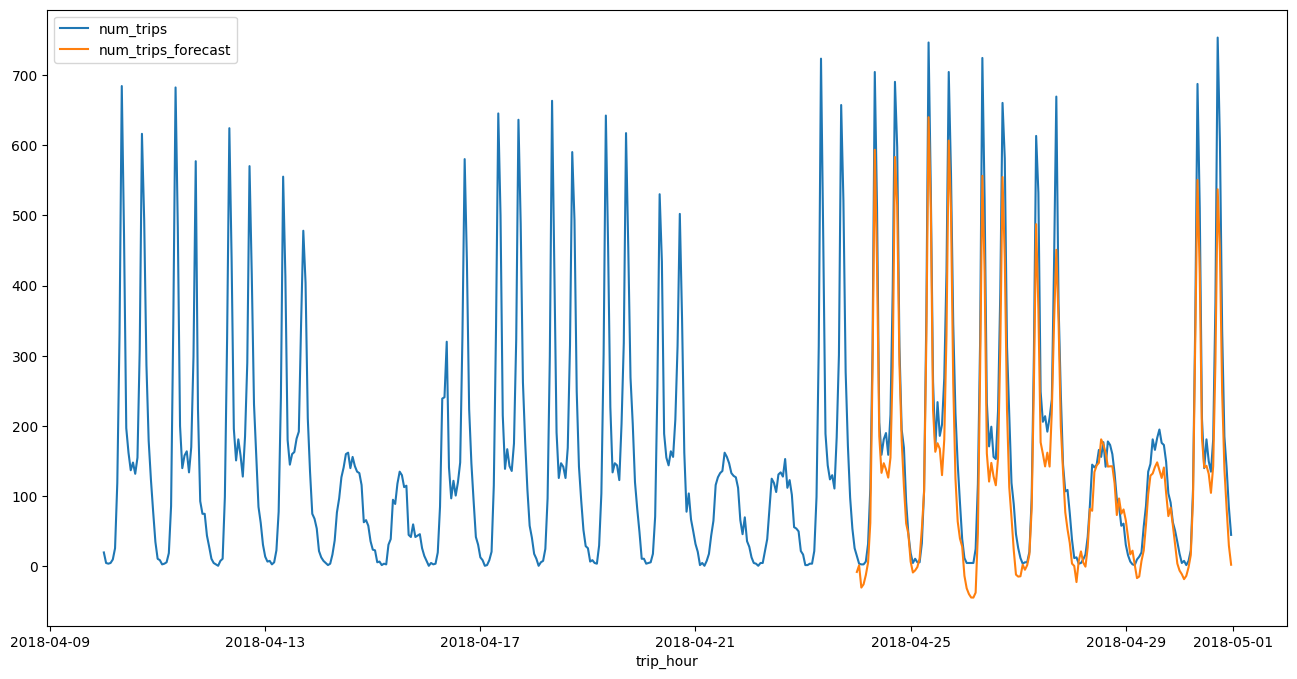

In [8]:
df_all = df_all.set_index("trip_hour")
df_all.plot.line(figsize=(16, 8))